In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [30]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [31]:
# check for null values

for col in data:
    print(col, data[col].isnull().sum() / len(data) * 100)

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.865319865319865
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.10437710437711
Embarked 0.22446689113355783


**NB: In the Geeks for Geeks Reference the columns Name and Ticket were dropped because they had alot of null values but according to this analysis, the data is definetly different, so i wont be dropping them. Hopefully this won't affect my marks 😬** 

In [32]:
# now we are to drop the Cabin column since it has alot of null data

data.drop('Cabin', inplace=True, axis='columns')

In [33]:
#check for categorical data
for col in data:
    print(col, data[col].dtypes)


PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Embarked object


In [34]:
categorical_data = ['Name', 'Sex', 'Ticket', 'Embarked']

numerical_data = [col for col in data if col not in categorical_data]

In [35]:
#fill the categorical data with the mode

for col in categorical_data:
    if(data[col].isna().sum() > 0):
        data[col] = data[col].fillna(data[col].mode()[0])

In [36]:
#fill the numerical data with mean

data[numerical_data] = data[numerical_data].fillna(data[numerical_data].mean())

In [37]:
#check again for any missing values
for col in data:
    print(col, data[col].isnull().sum() / len(data) * 100)

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Embarked 0.0


In [39]:
#Encode the categorical data
data = pd.concat([data, pd.get_dummies(data[['Name', 'Ticket']])], axis=1)
data.drop(['Name', 'Ticket'], inplace=True, axis='columns')

In [40]:
#for the rest of the categorical data we are to use the Ordinal encoder to encode them
from sklearn.preprocessing import OrdinalEncoder

cols = ['Sex', 'Embarked']

data[cols] = OrdinalEncoder().fit_transform(data[cols])
data[cols].head()

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0


In [41]:
#check the data types now minus obvoiusly the One Hot Encoded data

easily_visualized_cols = ['Sex', 'Embarked', 'PassengerId',
                          'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
                          'Embarked']

for col in easily_visualized_cols:
    print(col, data[col].dtypes)

Sex float64
Embarked float64
PassengerId int64
Survived int64
Pclass int64
Age float64
SibSp int64
Parch int64
Fare float64
Embarked float64


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Embarked'}>,
        <Axes: title={'center': 'PassengerId'}>],
       [<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Embarked'}>, <Axes: >, <Axes: >]],
      dtype=object)

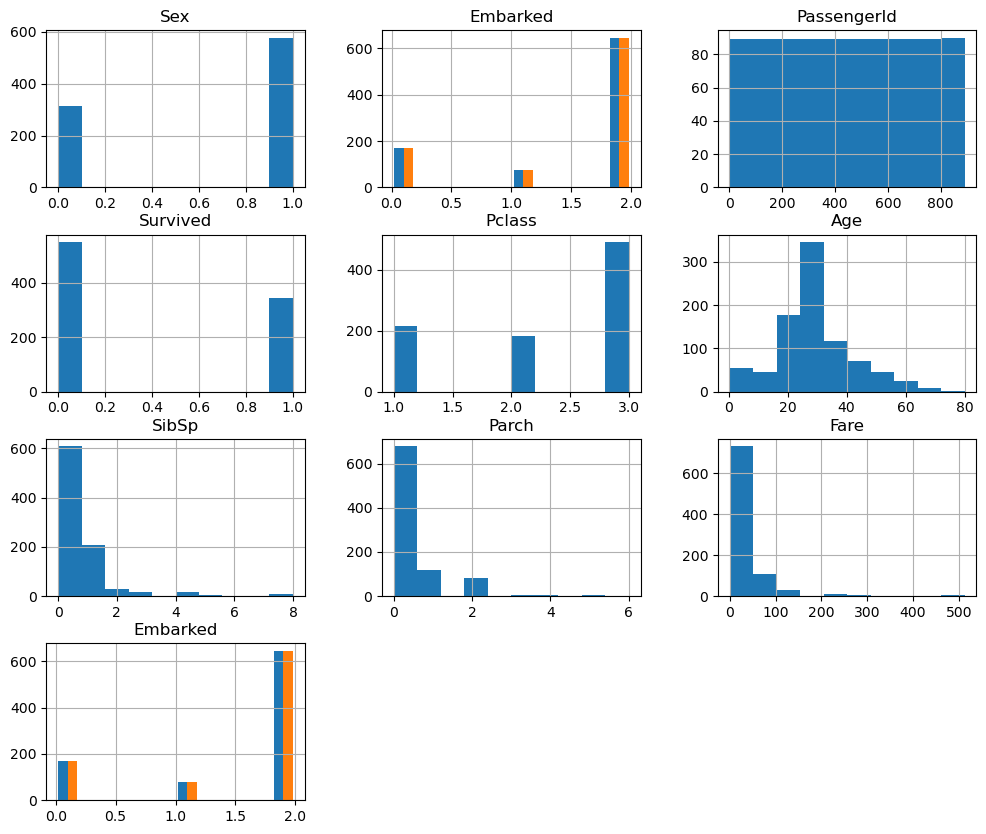

In [43]:
#So all the data is currently numerical, now some visualizations

import matplotlib.pyplot as plt

data[easily_visualized_cols].hist(figsize=(12, 10))

In [46]:
from collections import Counter

survived_count = Counter(data['Survived'])

survived_count

Counter({0: 549, 1: 342})

([<matplotlib.patches.Wedge at 0x2bd31036410>,
 [Text(-0.3925749350994583, 1.0275626113924428, "Didn't Survive"),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')])

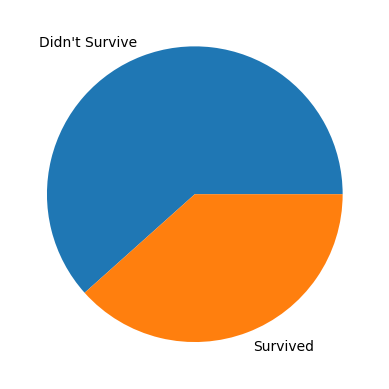

In [51]:
plt.pie(survived_count.values(), labels=['Didn\'t Survive', 'Survived'])

# Model Training

In [52]:
# drop the unnecessary columns

data.drop('PassengerId', axis='columns', inplace=True)

In [73]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [63]:
#scale that data, This for some reason decreased on the model's accuracy that's why its commented out
# from sklearn.preprocessing import StandardScaler

# X = StandardScaler().fit_transform(X)



In [74]:
X[:3]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,3,1.0,22.0,1,0,7.2500,2.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.0,38.0,1,0,71.2833,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,0.0,26.0,0,0,7.9250,2.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [76]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((668, 1579), (223, 1579), (668,), (223,))

In [56]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression().fit(Xtrain, ytrain)

c:\Users\RASHID\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
lr.score(Xtrain, ytrain)

0.9266467065868264

In [79]:
lr.score(Xtest, ytest)

0.8026905829596412

In [80]:
# couple od other models

from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier().fit(Xtrain, ytrain)

In [81]:
ridge.score(Xtrain, ytrain)

1.0

In [82]:
ridge.score(Xtest, ytest) # there's some overfitting, hyper parameter tuning can minimize it

0.8251121076233184

**NB Hyper parameter tuning can definetly improve on these models accuracy, anyways that's it for now, 🙂**